## Set Up

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
import matplotlib
import altair as alt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import HTML
alt.renderers.enable('notebook')
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

gdp_data = pd.read_csv('./GDP.csv')
gdp_data= gdp_data.fillna(method = "bfill")
gdp_capita_data = pd.read_csv('./GDP_capita.csv')
gdp_capita_data = gdp_capita_data.fillna(method = "bfill")
rsf_freedom_data = pd.read_csv('./rsf_data.csv')
rsf_freedom_data = rsf_freedom_data.fillna(method = "bfill")


gdp_capita_codes = gdp_capita_data["Country Code"].tolist()
gdp_codes = gdp_data["Country Code"].tolist()
final_gdp_data = pd.DataFrame()

for c in gdp_capita_codes:
    if c in gdp_codes:
        temp = gdp_data[gdp_data["Country Code"] == c]
        frames = [final_gdp_data, temp]
        final_gdp_data = pd.concat(frames)
final_gdp_data = final_gdp_data.merge(gdp_capita_data, on = 'Country Code')

In [24]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
rsf_codes = rsf_freedom_data["Country Code"].tolist()
final = pd.DataFrame()

for c in gdp_capita_codes:
    if c in rsf_codes:
        temp = rsf_freedom_data[rsf_freedom_data["Country Code"] == c]
        frames = [final, temp]
        final = pd.concat(frames)
final = final.drop(['FR_Country', 'EN_country', 'ES_country', 'Zone'], axis=1)
real_final = final_gdp_data.merge(final, on = 'Country Code')
real_final.head()

,Country Name_x,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2015_y,2016_y,2017_y,Rank2018,Underlying situation score 2016,Abuse score 2016,Overall Score 2016,Progression RANK,Rank 2017,Score 2017
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,569.577923,561.778746,585.850064,118,29.53,68.3,37.28,2,120,39.46
1,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,3683.552607,3308.772828,4170.312280,121,38.35,0.0,38.35,4,125,40.42
2,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,3952.830781,4131.872341,4537.862492,75,29.49,16.1,29.49,1,76,29.92
3,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,36038.267600,37231.815670,39146.548840,37,22.21,0.0,22.21,-2,35,21.03
4,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,39122.049710,38517.800390,40698.849340,128,40.37,40.8,40.86,-9,119,39.39


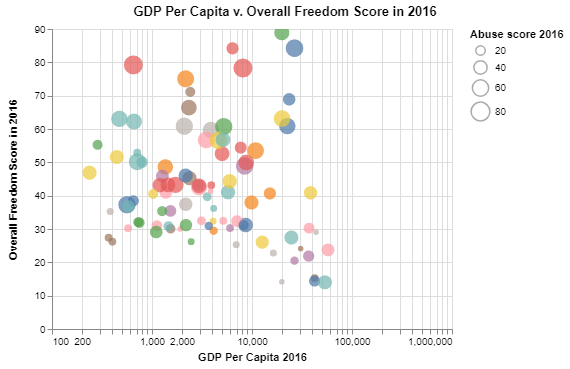

In [4]:
alt.Chart(real_final).mark_circle().encode(
    alt.X('2016_y:Q', scale=alt.Scale(type='log'), axis=alt.Axis(title='GDP Per Capita 2016')),
    alt.Y('Overall Score 2016:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Overall Freedom Score in 2016')),
    size='Abuse score 2016:Q',
    color=alt.Color('Country Name_x', legend=None),
    tooltip=['Country Name_x', 'Rank 2017', 'Overall Score 2016', '2016_y', 'Abuse score 2016']
).properties(
    title='GDP Per Capita v. Overall Freedom Score in 2016'
).interactive()

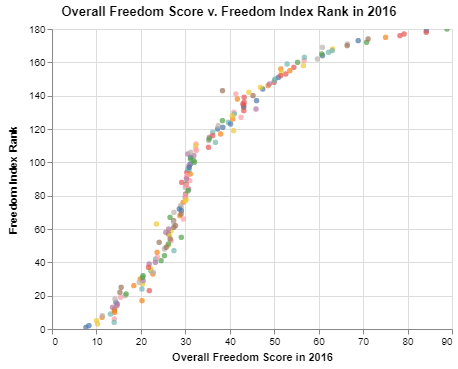

In [5]:
alt.Chart(real_final).mark_circle().encode(
    alt.X('Overall Score 2016:Q', axis=alt.Axis(title='Overall Freedom Score in 2016')),
    alt.Y('Rank 2017:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Freedom Index Rank')),
    tooltip=['Country Name_x', 'Rank 2017', 'Overall Score 2016', '2016_y', 'Abuse score 2016'],
    color=alt.Color('Country Name_x', legend=None),
).properties(
    title='Overall Freedom Score v. Freedom Index Rank in 2016'
).interactive()

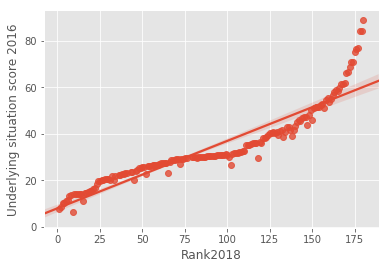

In [6]:
sns.regplot(x="Rank2018", y="Underlying situation score 2016" , data=real_final)

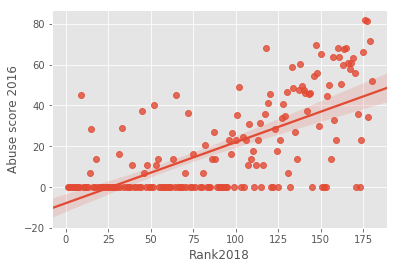

In [7]:
sns.regplot(x="Rank2018", y="Abuse score 2016" , data=real_final)

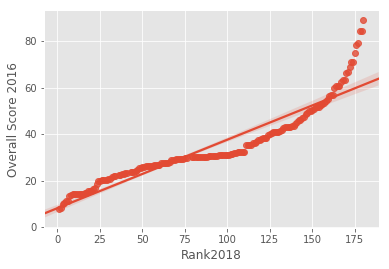

In [8]:
sns.regplot(x="Rank2018", y="Overall Score 2016" , data=real_final)

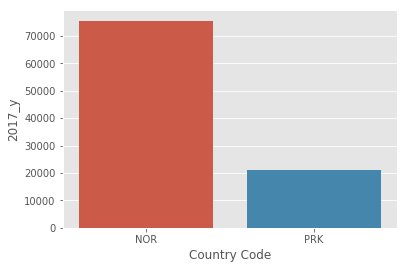

In [9]:
norway = real_final[real_final['Country Code'] == 'NOR']
north_korea = real_final[real_final['Country Code'] == 'PRK']
l = [norway, north_korea]
data = pd.concat(l)
data

sns.barplot(x="Country Code", y="2017_y", data=data)

In [10]:
len(real_final['Overall Score 2016'].tolist())

176

In [11]:
len(real_final['2017_y'].tolist())

176

In [12]:
md = sm.WLS(real_final['2017_y'], real_final['Overall Score 2016'])
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 2017_y   R-squared:                       0.170
Model:                            WLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     35.81
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.20e-08
Time:                        11:51:46   Log-Likelihood:                -2002.7
No. Observations:                 176   AIC:                             4007.
Df Residuals:                     175   BIC:                             4011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Overall Score 2016   247.6901     41.388      5.985      0.000     166.005     329.375
==============================================================================
Omnibus:                       77.647   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.575
Skew:                           1.928   Prob(JB):                     3.10e-46
Kurtosis:                       6.703   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
md = sm.OLS(real_final['2017_y'], real_final['Overall Score 2016'])
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 2017_y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     35.81
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.20e-08
Time:                        12:08:56   Log-Likelihood:                -2002.7
No. Observations:                 176   AIC:                             4007.
Df Residuals:                     175   BIC:                             4011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Overall Score 2016   247.6901     41.388      5.985      0.000     166.005     329.375
==============================================================================
Omnibus:                       77.647   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.575
Skew:                           1.928   Prob(JB):                     3.10e-46
Kurtosis:                       6.703   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
real_final

,Country Name_x,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2015_y,2016_y,2017_y,Rank2018,Underlying situation score 2016,Abuse score 2016,Overall Score 2016,Progression RANK,Rank 2017,Score 2017
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,569.577923,561.778746,585.850064,118,29.53,68.3,37.28,2,120,39.46
1,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,3683.552607,3308.772828,4170.312280,121,38.35,0.0,38.35,4,125,40.42
2,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,3952.830781,4131.872341,4537.862492,75,29.49,16.1,29.49,1,76,29.92
3,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,36038.267600,37231.815670,39146.548840,37,22.21,0.0,22.21,-2,35,21.03
4,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,39122.049710,38517.800390,40698.849340,128,40.37,40.8,40.86,-9,119,39.39
5,Argentina,ARG,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,13698.293440,12654.355000,14401.974850,52,22.54,40.1,26.05,-2,50,25.07
6,Armenia,ARM,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,...,3617.935746,3605.743117,3936.798320,80,29.99,0.0,29.99,-1,79,30.38
7,Australia,AUS,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,1.988801e+10,2.150185e+10,2.375854e+10,2.593124e+10,...,56561.412380,49896.681100,53799.938090,19,15.46,0.0,15.46,0,19,16.02
8,Austria,AUT,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,1.988801e+10,2.150185e+10,2.375854e+10,2.593124e+10,...,44206.784280,44731.010860,47290.911650,11,14.04,0.0,14.04,0,11,13.47
9,Azerbaijan,AZE,GDP (current US$),NY.GDP.MKTP.CD,1.857319e+10,1.964834e+10,1.988801e+10,2.150185e+10,2.375854e+10,2.593124e+10,...,5500.310382,3880.738731,4131.618310,163,57.81,59.6,59.73,-1,162,56.40


In [21]:
#Contrast how Freedom Index has changed in countries with low and high GDP? (Pick 1-2 countries on each side) Does having a high/low GDP affect Freedom Index? (Difference in Differences)
bulgaria = real_final[real_final['Country Code'] == 'BGR']
france = real_final[real_final['Country Code'] == 'FRA']
burundi = real_final[real_final['Country Code'] == 'BDI']
bahrain = real_final[real_final['Country Code'] == 'BHR']
differences = pd.DataFrame()
frames = [differences, bulgaria, france]
differences = pd.concat(frames)
md = sm.OLS(differences['2017_y'], differences['Overall Score 2016'])
mdf = md.fit()
mdf.summary()


C:\Users\aliar\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 2017_y   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.9087
Date:                Tue, 04 Dec 2018   Prob (F-statistic):              0.515
Time:                        12:18:49   Log-Likelihood:                -22.657
No. Observations:                   2   AIC:                             47.31
Df Residuals:                       1   BIC:                             46.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Overall Score 2016   654.1734    686.255      0.953      0.515   -8065.518    9373.865
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.896
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
burundi = real_final[real_final['Country Code'] == 'BDI']
bahrain = real_final[real_final['Country Code'] == 'BHR']
differences = pd.DataFrame()
frames = [differences, burundi, bahrain]
differences = pd.concat(frames)
md = sm.OLS(differences['2017_y'], differences['Overall Score 2016'])
mdf = md.fit()
mdf.summary()


C:\Users\aliar\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 2017_y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     1.280
Date:                Tue, 04 Dec 2018   Prob (F-statistic):              0.461
Time:                        12:20:12   Log-Likelihood:                -21.463
No. Observations:                   2   AIC:                             44.93
Df Residuals:                       1   BIC:                             43.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Overall Score 2016   215.6620    190.590      1.132      0.461   -2206.013    2637.337
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.995
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
real_final.to_csv('./final.csv')